In [3]:
import pandas as pd
import numpy as np

fish = pd.read_csv("https://bit.ly/fish_csv")
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
data = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
target = fish['Species'].to_numpy()

target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

a = KNeighborsClassifier(n_neighbors=3)
a.fit(train_scaled, train_target)

a.score(test_scaled, test_target)

0.725

In [8]:
new = ([242.0,	25.4,	30.0,	11.5200,	4.0200] - mean) / std
a.predict([new])

array(['Bream'], dtype=object)

In [11]:
result = a.predict_proba(test_scaled[:5])
np.round(result, decimals=3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.667, 0.333, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.667, 0.   , 0.333, 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ]])

In [12]:
a.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [13]:
from sklearn.linear_model import LogisticRegression

a = LogisticRegression()
a.fit(train_scaled, train_target)
a.score(test_scaled, test_target)

0.725

In [14]:
result = a.predict_proba(test_scaled[:5])
np.round(result, decimals=3)

array([[0.   , 0.047, 0.152, 0.002, 0.061, 0.737, 0.001],
       [0.019, 0.382, 0.223, 0.006, 0.214, 0.148, 0.008],
       [0.877, 0.044, 0.023, 0.008, 0.025, 0.   , 0.024],
       [0.015, 0.046, 0.652, 0.033, 0.225, 0.01 , 0.017],
       [0.011, 0.125, 0.487, 0.018, 0.271, 0.076, 0.012]])

In [15]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-10-24 07:46:23--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-10-24 07:46:23--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-10-24 07:46:24--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443..

In [16]:
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
fruits

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [17]:
fruits.shape

(300, 100, 100)

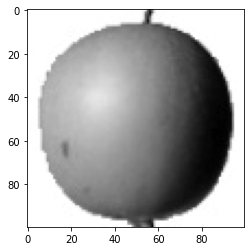

In [19]:
plt.imshow(fruits[0], cmap = 'gray_r')

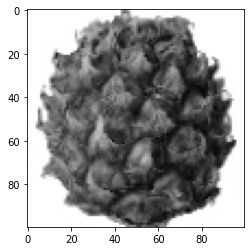

In [20]:
plt.imshow(fruits[100], cmap = 'gray_r')

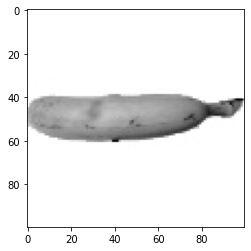

In [21]:
plt.imshow(fruits[200], cmap = 'gray_r')

In [22]:
apple = fruits[:100].reshape(-1, 10000)
pineapple = fruits[100:200].reshape(-1, 10000)
banana = fruits[200:].reshape(-1, 10000)

In [23]:
apple

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [24]:
apple.shape

(100, 10000)

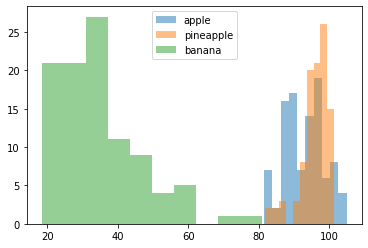

In [25]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.5)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.5)
plt.hist(np.mean(banana, axis = 1), alpha = 0.5)
plt.legend(['apple', 'pineapple', 'banana'])

<BarContainer object of 10000 artists>

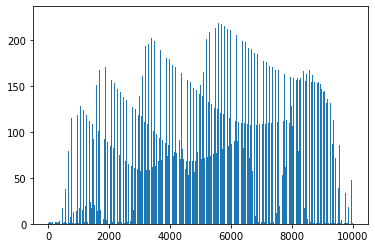

In [26]:
plt.bar(range(10000), np.mean(apple, axis = 0))

<BarContainer object of 10000 artists>

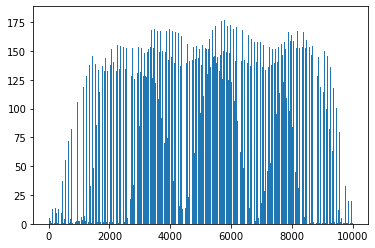

In [27]:
plt.bar(range(10000), np.mean(pineapple, axis = 0))

<BarContainer object of 10000 artists>

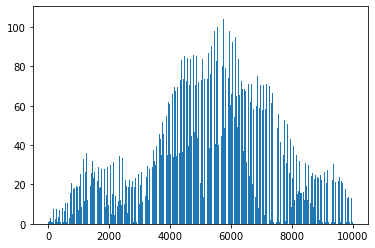

In [28]:
plt.bar(range(10000), np.mean(banana, axis = 0))

In [29]:
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

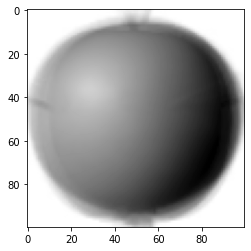

In [30]:
plt.imshow(apple_mean, cmap = 'gray_r')

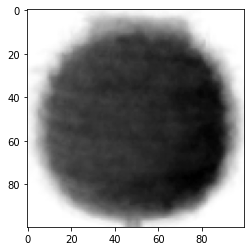

In [31]:
plt.imshow(pineapple_mean, cmap = 'gray_r')

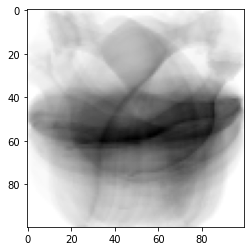

In [32]:
plt.imshow(banana_mean, cmap = 'gray_r')

In [42]:
abs_diff = abs(fruits - banana_mean)
abs_diff

array([[[0.1 , 0.07, 0.1 , ..., 0.04, 0.01, 0.05],
        [0.12, 0.03, 0.04, ..., 0.  , 0.01, 0.  ],
        [0.06, 0.02, 0.02, ..., 0.  , 0.05, 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.1 , 0.07, 0.1 , ..., 0.04, 0.01, 0.05],
        [0.12, 0.03, 0.04, ..., 0.  , 0.01, 0.  ],
        [0.06, 0.02, 0.02, ..., 0.  , 0.05, 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.1 , 0.07, 0.1 , ..., 0.04, 0.01, 0.05],
        [0.12, 0.03, 0.04, ..., 0.  , 0.01, 0.  ],
        [0.06, 0.02, 0.02, ..., 0.  , 0.05, 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       ...,

       [[0.1 , 0.07, 0.1

In [43]:
abs_mean = np.mean(abs_diff, axis = (1,2))
abs_mean

array([61.372199, 66.769031, 60.368607, 67.688021, 62.536795, 56.543023,
       64.020057, 65.143385, 60.936935, 55.397669, 59.493467, 64.542953,
       63.652365, 59.552695, 66.700295, 58.774049, 60.511367, 69.770239,
       66.114137, 71.059893, 74.073013, 61.143149, 69.024541, 67.041009,
       64.082469, 64.889731, 67.270787, 63.325041, 72.142649, 66.530167,
       61.363381, 60.517299, 67.700587, 66.269039, 69.570341, 62.630981,
       70.005863, 58.494995, 65.656083, 67.715533, 61.046739, 71.533921,
       61.982375, 62.895183, 61.435307, 58.839567, 66.830021, 60.188155,
       65.882507, 61.481897, 65.347927, 68.986749, 67.479383, 59.035189,
       60.502947, 61.873685, 63.426711, 66.339373, 59.287405, 66.701803,
       72.764515, 63.882149, 57.736025, 56.702995, 72.150333, 59.628951,
       61.914069, 69.272103, 63.708215, 61.314299, 66.400505, 67.502521,
       56.365441, 59.145037, 65.976951, 63.349811, 61.522069, 67.889405,
       66.914713, 65.836491, 60.432745, 57.472153, 

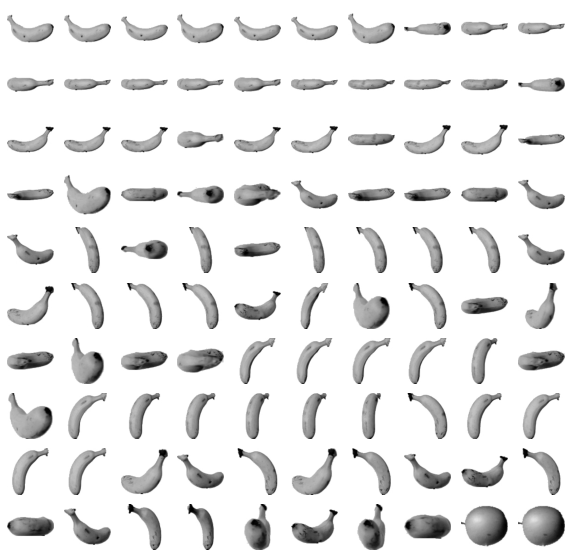

In [44]:
apple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap = 'gray_r')
    axs[i, j].axis('off')

plt.show()

In [45]:
fruits = np.load('fruits_300.npy')
fruits2 = fruits.reshape(-1, 10000)

from sklearn.cluster import KMeans

a = KMeans(n_clusters = 3)
a.fit(fruits2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
target = a.labels_
target

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [47]:
box = []

for i in range(2, 7):
  a = KMeans(n_clusters=i)
  a.fit(fruits2)
  box.append(a.inertia_)

box

[5856532545.983117,
 5074977316.08837,
 4660128488.685939,
 4306968740.632695,
 3997030130.9539843]

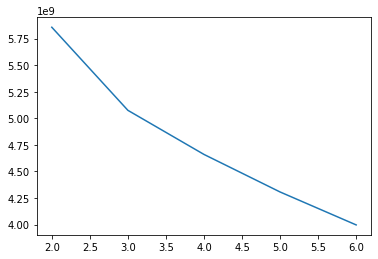

In [48]:
plt.plot(range(2, 7), box)

In [49]:
wine = pd.read_csv("https://bit.ly/wine-date")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [58]:
from sklearn.tree import DecisionTreeClassifier

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8449105253030594
0.8446153846153847


[Text(203.25220292094474, 212.91, 'X[1] <= 4.425\ngini = 0.365\nsamples = 5197\nvalue = [1248, 3949]'),
 Text(99.43081293009631, 203.85, 'X[1] <= 1.625\ngini = 0.479\nsamples = 2936\nvalue = [1169, 1767]'),
 Text(17.2257227816375, 194.79, 'X[1] <= 1.375\ngini = 0.189\nsamples = 1043\nvalue = [110, 933]'),
 Text(3.8276316946618594, 185.73, 'X[2] <= 3.85\ngini = 0.047\nsamples = 543\nvalue = [13, 530]'),
 Text(3.356538563011169, 176.67, 'X[1] <= 1.175\ngini = 0.036\nsamples = 540\nvalue = [10, 530]'),
 Text(1.4132793949520712, 167.60999999999999, 'X[2] <= 2.895\ngini = 0.008\nsamples = 255\nvalue = [1, 254]'),
 Text(0.9421862633013808, 158.55, 'X[0] <= 12.35\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4710931316506904, 149.49, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(1.4132793949520712, 149.49, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1.8843725266027616, 158.55, 'gini = 0.0\nsamples = 249\nvalue = [0, 249]'),
 Text(5.299797731070267, 167.60999999999999, 'X[2] 

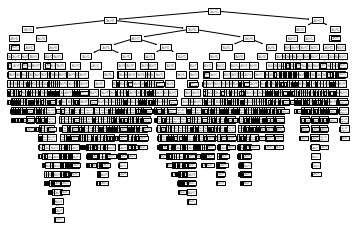

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(dt)

[Text(558.0, 713.475, 'sugar <= 4.325\ngini = 0.375\nsamples = 5197\nvalue = [1297, 3900]'),
 Text(279.0, 509.625, 'sugar <= 1.625\ngini = 0.485\nsamples = 2919\nvalue = [1210, 1709]'),
 Text(139.5, 305.775, 'sugar <= 1.375\ngini = 0.201\nsamples = 1035\nvalue = [117, 918]'),
 Text(69.75, 101.92499999999995, 'gini = 0.048\nsamples = 533\nvalue = [13, 520]'),
 Text(209.25, 101.92499999999995, 'gini = 0.329\nsamples = 502\nvalue = [104, 398]'),
 Text(418.5, 305.775, 'alcohol <= 11.025\ngini = 0.487\nsamples = 1884\nvalue = [1093, 791]'),
 Text(348.75, 101.92499999999995, 'gini = 0.406\nsamples = 1130\nvalue = [810, 320]'),
 Text(488.25, 101.92499999999995, 'gini = 0.469\nsamples = 754\nvalue = [283, 471]'),
 Text(837.0, 509.625, 'sugar <= 6.25\ngini = 0.073\nsamples = 2278\nvalue = [87, 2191]'),
 Text(697.5, 305.775, 'pH <= 3.295\ngini = 0.196\nsamples = 480\nvalue = [53, 427]'),
 Text(627.75, 101.92499999999995, 'gini = 0.108\nsamples = 333\nvalue = [19, 314]'),
 Text(767.25, 101.924999

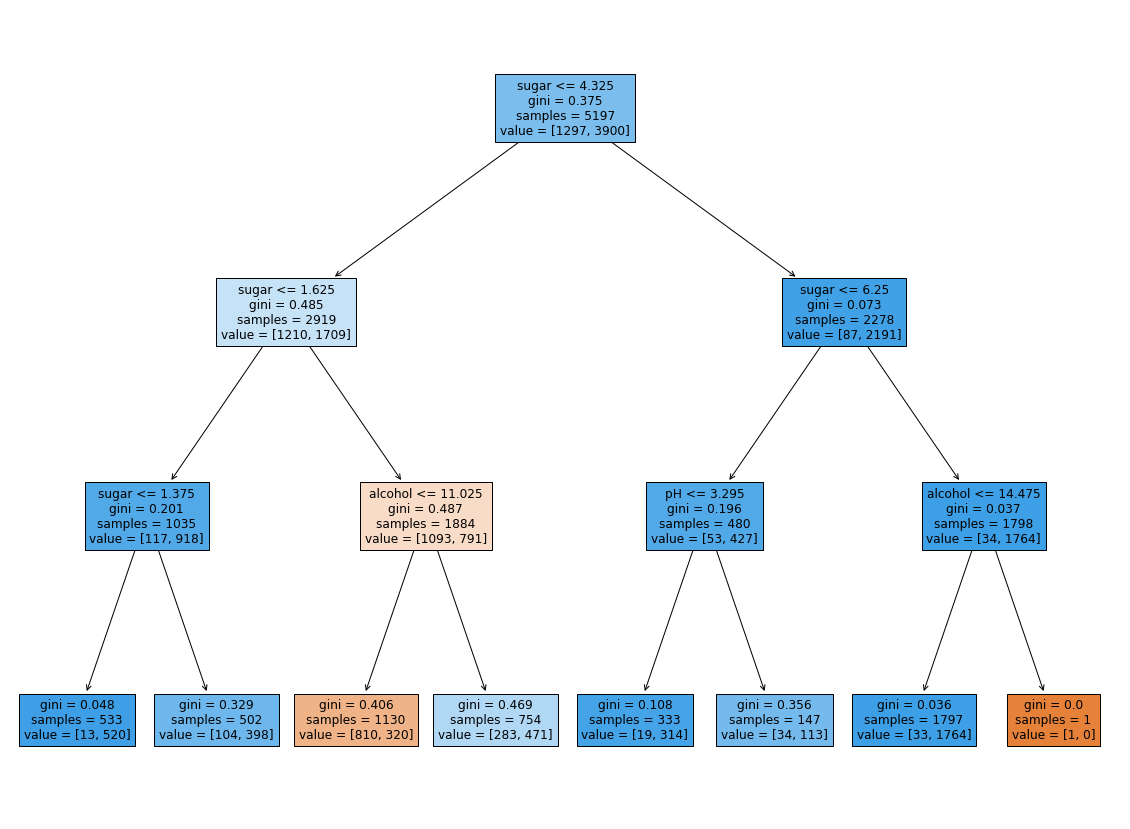

In [60]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

In [63]:
from sklearn.ensemble import RandomForestClassifier

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

dt = RandomForestClassifier()
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9973061381566288
0.8992307692307693
